In [22]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def cart2sph(x, y, z):
    dxy = np.sqrt(x**2 + y**2)
    r = np.sqrt(dxy**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arctan2(z, dxy)
    theta, phi = np.rad2deg([theta, phi])
    return theta % 360, phi, r

def sph2cart(theta, phi, r=1):
    theta, phi = np.deg2rad([theta, phi])
    z = r * np.sin(phi)
    rcosphi = r * np.cos(phi)
    x = rcosphi * np.cos(theta)
    y = rcosphi * np.sin(theta)
    return x, y, z

In [43]:
T = np.loadtxt(open("200000.dat","rb"))
print(T.max())
print(T.min())

3134.64
-3149.47


In [23]:
pts = 1 - 2 * np.random.rand(len(T), 3)
l = np.sqrt(np.sum(pts**2, axis=1))
pts = pts / l[:, np.newaxis]
#T = 150 * np.random.rand(500)

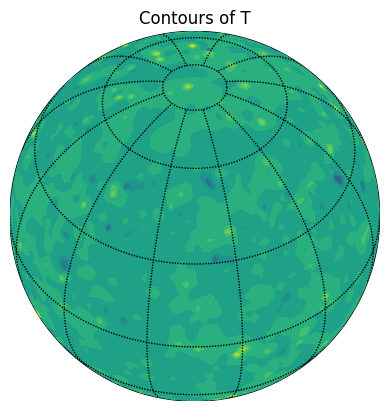

In [44]:
theta, phi, r = cart2sph(*pts.T)
nrows, ncols = (90,180)
lon, lat = np.meshgrid(np.linspace(0,360,ncols), np.linspace(-90,90,nrows))
xg,yg,zg = sph2cart(lon,lat)
Ti = np.zeros_like(lon)
for r in range(nrows):
    for c in range(ncols):
        v = np.array([xg[r,c], yg[r,c], zg[r,c]])
        angs = np.arccos(np.dot(pts, v))
        idx = np.where(angs == 0)[0]
        if idx.any():
            Ti[r,c] = T[idx[0]]
        else:
            idw = 1 / angs**2 / sum(1 / angs**2)
            Ti[r,c] = np.sum(T * idw)

# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=15)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()

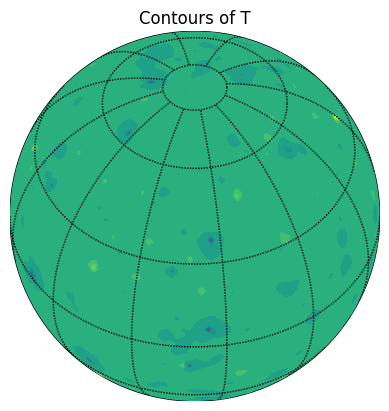

In [34]:
# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=50)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()

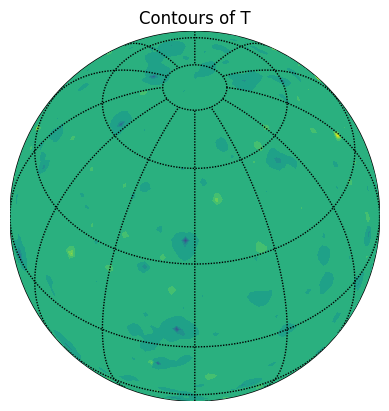

In [35]:
# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=60)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()

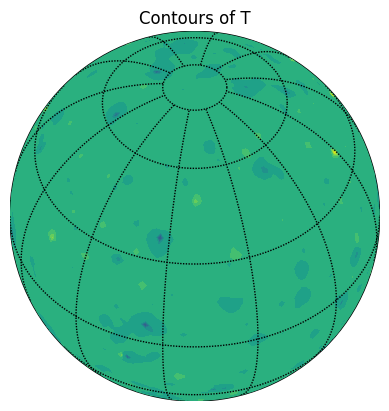

In [36]:
# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=70)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()

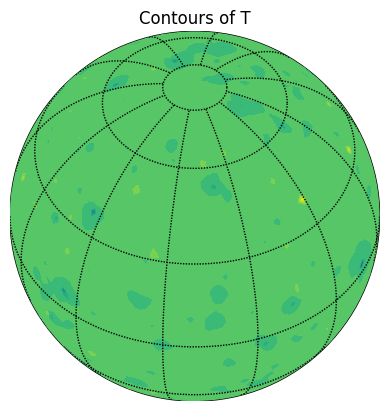

In [37]:
# set up map projection
map = Basemap(projection='ortho', lat_0=45, lon_0=100)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map(lon, lat)
# contour data over the map.
cs = map.contourf(x, y, Ti, 15)
plt.title('Contours of T')
plt.show()